In [1]:
import tensorflow as tf
import os
import re
import tqdm
import random
import shutil
import pandas as pd
import numpy as np
from xml.etree import ElementTree as ET
from keras.utils import load_img
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ANNOTATION_PATH = 'archive/annotations/'
IMG_PATH = 'archive/images/'

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
def create_csv(path):
    res = []
    for filename in os.listdir(path):
        tree = ET.parse(path+filename)
        root = tree.getroot()
        row = parse_object(root)
        res.append(row)
         
    df = pd.DataFrame(columns=['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])
    for item in res:
        d = pd.DataFrame(item, columns=['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])
        df = pd.concat([df, d])
        
    return df


def parse_object(xml):
    imgs = []
    for obj in xml.findall('object'):
        size = obj.find('bndbox')
        xmin, ymin, xmax, ymax= int(size[0].text), int(size[1].text), int(size[2].text), int(size[3].text)
        fn = xml.find('filename').text
        fn = re.search(r'[0-9]+', fn)
        imgs.append((int(fn[0]), xmin, ymin, xmax, ymax, obj[0].text))
    
    return imgs

t = create_csv('archive/annotations/')
t

,filename,xmin,ymin,xmax,ymax,label
0,4538,133,99,164,139,head
1,4538,245,108,276,147,head
2,4538,88,105,115,136,head
3,4538,283,129,300,156,head
4,4538,320,123,338,151,head
...,...,...,...,...,...,...
15,4244,209,0,231,19,helmet
16,4244,130,0,151,7,helmet
17,4244,193,0,210,11,helmet
0,2423,178,163,225,211,helmet


In [19]:
t.to_csv('archive/data.csv', index=False)

In [ ]:
ds = 

In [4]:
def parse_csv_line(line):
    # Функция для чтения данных из csv-файлов.
    record_defaults = [0, 0, 0, 0, 0, ""]
    filename, x, y, xmax, ymax, class_name = tf.io.decode_csv(line, record_defaults)
    bbox = [x, y, xmax, ymax]
    print(filename)
    return filename, {'bbox': bbox, 'classes': class_name}

def load_dataset(image_dir, csv_path, classes_file, batch_size, image_size):
    # Функция для создания tensorflow dataset.
    classes = [line.rstrip('\n').split(',')[0] for line in open(classes_file)]
    
    dataset = tf.data.TextLineDataset(csv_path)
    dataset = dataset.map(lambda line: parse_csv_line(line))
    dataset = dataset.map(lambda filename, bbox: (os.path.join(image_dir, filename[0]), bbox))
    dataset = dataset.map(lambda img_path, bbox: (tf.io.read_file(img_path), bbox))
    dataset = dataset.map(lambda img, bbox: ({'image': tf.image.decode_jpeg(img)}, bbox))
    dataset = dataset.map(lambda x, y: ({'image': tf.image.resize(x['image'], image_size)}, y))
    dataset = dataset.map(lambda x, y: (x, tf.clip_by_value(tf.cast(classes[y['classes']], tf.float32), 0, 1)))
    dataset = dataset.batch(batch_size)
    return dataset

ds = load_dataset('archive/images/', 'archive/data.csv', 'archive/classes.txt', 32, (415, 416))

FileNotFoundError: [Errno 2] No such file or directory: 'archive/classes.txt'

In [107]:
a = np.array([1, 2, 3])
b = tf.constant(a)
b[0]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [24]:
for filename in t['filename']:
    img = load_img(filename)
    img = tf.cast(img, dtype=tf.int32)

archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers4538.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers3615.png
archive/images/hard_hat_workers2947.png
archive/images/hard_hat_workers2947.png
archive/images/hard_hat_workers2947.png
archive/images/hard_hat_workers2221.png
archive/images/hard_hat_workers2221.png
archive/images/hard_hat_workers2805.png
archive/images/hard_hat_workers2805.png
archive/images/hard_hat_workers3571.png
archive/images/hard_hat_workers3571.png


archive/images/hard_hat_workers4753.png
archive/images/hard_hat_workers4753.png
archive/images/hard_hat_workers4753.png
archive/images/hard_hat_workers4753.png
archive/images/hard_hat_workers4753.png
archive/images/hard_hat_workers3802.png
archive/images/hard_hat_workers3802.png
archive/images/hard_hat_workers3802.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers1082.png
archive/images/hard_hat_workers4659.png
archive/images/hard_hat_workers4659.png
archive/images/hard_hat_workers4659.png
archive/images/hard_hat_workers4659.png
archive/images/hard_hat_workers2003.png


archive/images/hard_hat_workers823.png
archive/images/hard_hat_workers4740.png
archive/images/hard_hat_workers4740.png
archive/images/hard_hat_workers889.png
archive/images/hard_hat_workers889.png
archive/images/hard_hat_workers889.png
archive/images/hard_hat_workers4065.png
archive/images/hard_hat_workers4065.png
archive/images/hard_hat_workers4065.png
archive/images/hard_hat_workers4065.png
archive/images/hard_hat_workers4969.png
archive/images/hard_hat_workers4969.png
archive/images/hard_hat_workers4969.png
archive/images/hard_hat_workers4668.png
archive/images/hard_hat_workers4668.png
archive/images/hard_hat_workers4668.png
archive/images/hard_hat_workers4668.png
archive/images/hard_hat_workers4668.png
archive/images/hard_hat_workers4668.png
archive/images/hard_hat_workers2750.png
archive/images/hard_hat_workers2750.png
archive/images/hard_hat_workers2750.png
archive/images/hard_hat_workers2750.png
archive/images/hard_hat_workers3735.png
archive/images/hard_hat_workers3735.png
arch

archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers4732.png
archive/images/hard_hat_workers2098.png
archive/images/hard_hat_workers2098.png
archive/images/hard_hat_workers2098.png
archive/images/hard_hat_workers856.png
archive/images/hard_hat_workers856.png
ar

archive/images/hard_hat_workers1208.png
archive/images/hard_hat_workers1208.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers4093.png
archive/images/hard_hat_workers1203.png
archive/images/hard_hat_workers1203.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers2793.png
archive/images/hard_hat_workers1151.png
archive/images/hard_hat_workers1151.png
archive/images/hard_hat_workers294.png
archive/images/hard_hat_workers294.png
ar

archive/images/hard_hat_workers2492.png
archive/images/hard_hat_workers2492.png
archive/images/hard_hat_workers2492.png
archive/images/hard_hat_workers2492.png
archive/images/hard_hat_workers2566.png
archive/images/hard_hat_workers2566.png
archive/images/hard_hat_workers1088.png
archive/images/hard_hat_workers1088.png
archive/images/hard_hat_workers4936.png
archive/images/hard_hat_workers1003.png
archive/images/hard_hat_workers1003.png
archive/images/hard_hat_workers1003.png
archive/images/hard_hat_workers1003.png
archive/images/hard_hat_workers1003.png
archive/images/hard_hat_workers1003.png
archive/images/hard_hat_workers100.png
archive/images/hard_hat_workers100.png
archive/images/hard_hat_workers100.png
archive/images/hard_hat_workers100.png
archive/images/hard_hat_workers100.png
archive/images/hard_hat_workers2097.png
archive/images/hard_hat_workers2543.png
archive/images/hard_hat_workers2543.png
archive/images/hard_hat_workers2543.png
archive/images/hard_hat_workers2543.png
archi

archive/images/hard_hat_workers498.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1571.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1920.png
archive/images/hard_hat_workers1488.png
archive/images/hard_hat_workers1488.png
archive/images/hard_hat_workers1488.png
archive/images/hard_hat_workers3423.png
a

archive/images/hard_hat_workers2674.png
archive/images/hard_hat_workers2674.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers3826.png
archive/images/hard_hat_workers1975.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/images/hard_hat_workers418.png
archive/imag

archive/images/hard_hat_workers805.png
archive/images/hard_hat_workers805.png
archive/images/hard_hat_workers805.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2340.png
archive/images/hard_hat_workers2174.png
archive/images/hard_hat_workers2174.png
archive/images/hard_hat_workers2174.png
archive/images/hard_hat_workers4445.png
archive/images/hard_hat_workers4445.png
archive/images/hard_hat_workers4445.png
archive/images/hard_hat_workers4445.png
archive/images/hard_hat_workers4445.png
archive/images/hard_hat_workers903.png
archive/images/hard_hat_workers903.png
archive/images/hard_hat_workers3343.png
archive/images/hard_hat_workers3343.png
archi

archive/images/hard_hat_workers4014.png
archive/images/hard_hat_workers4014.png
archive/images/hard_hat_workers4014.png
archive/images/hard_hat_workers4014.png
archive/images/hard_hat_workers3253.png
archive/images/hard_hat_workers3253.png
archive/images/hard_hat_workers3253.png
archive/images/hard_hat_workers3253.png
archive/images/hard_hat_workers3488.png
archive/images/hard_hat_workers3488.png
archive/images/hard_hat_workers3488.png
archive/images/hard_hat_workers3716.png
archive/images/hard_hat_workers2522.png
archive/images/hard_hat_workers2522.png
archive/images/hard_hat_workers4828.png
archive/images/hard_hat_workers4828.png
archive/images/hard_hat_workers2870.png
archive/images/hard_hat_workers2870.png
archive/images/hard_hat_workers2870.png
archive/images/hard_hat_workers189.png
archive/images/hard_hat_workers2212.png
archive/images/hard_hat_workers2212.png
archive/images/hard_hat_workers2212.png
archive/images/hard_hat_workers2212.png
archive/images/hard_hat_workers2212.png
a

archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers2028.png
archive/images/hard_hat_workers257.png
archive/images/hard_hat_workers257.png
archive/images/hard_hat_workers257.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers2616.png
archive/images/hard_hat_workers4815.png
archive/images/hard_hat_workers4815.png
archive/images/hard_hat_workers4270.png
archive/images/hard_hat_workers335.png
archive/images/hard_hat_workers335.png
archi

archive/images/hard_hat_workers169.png
archive/images/hard_hat_workers169.png
archive/images/hard_hat_workers4667.png
archive/images/hard_hat_workers4667.png
archive/images/hard_hat_workers1783.png
archive/images/hard_hat_workers1783.png
archive/images/hard_hat_workers1783.png
archive/images/hard_hat_workers1783.png
archive/images/hard_hat_workers645.png
archive/images/hard_hat_workers645.png
archive/images/hard_hat_workers2582.png
archive/images/hard_hat_workers2582.png
archive/images/hard_hat_workers2582.png
archive/images/hard_hat_workers2541.png
archive/images/hard_hat_workers2541.png
archive/images/hard_hat_workers2541.png
archive/images/hard_hat_workers2541.png
archive/images/hard_hat_workers2541.png
archive/images/hard_hat_workers2541.png
archive/images/hard_hat_workers3185.png
archive/images/hard_hat_workers3185.png
archive/images/hard_hat_workers3185.png
archive/images/hard_hat_workers3185.png
archive/images/hard_hat_workers3665.png
archive/images/hard_hat_workers3665.png
arch

archive/images/hard_hat_workers714.png
archive/images/hard_hat_workers714.png
archive/images/hard_hat_workers697.png
archive/images/hard_hat_workers697.png
archive/images/hard_hat_workers697.png
archive/images/hard_hat_workers697.png
archive/images/hard_hat_workers697.png
archive/images/hard_hat_workers2106.png
archive/images/hard_hat_workers2106.png
archive/images/hard_hat_workers4934.png
archive/images/hard_hat_workers4934.png
archive/images/hard_hat_workers4934.png
archive/images/hard_hat_workers4934.png
archive/images/hard_hat_workers4934.png
archive/images/hard_hat_workers4934.png
archive/images/hard_hat_workers1219.png
archive/images/hard_hat_workers1219.png
archive/images/hard_hat_workers1219.png
archive/images/hard_hat_workers1219.png
archive/images/hard_hat_workers941.png
archive/images/hard_hat_workers4310.png
archive/images/hard_hat_workers4310.png
archive/images/hard_hat_workers4176.png
archive/images/hard_hat_workers4176.png
archive/images/hard_hat_workers4176.png
archive/

archive/images/hard_hat_workers803.png
archive/images/hard_hat_workers803.png
archive/images/hard_hat_workers803.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers587.png
archive/images/hard_hat_workers1911.png
archive/images/hard_hat_workers1911.png
archive/images/hard_hat_workers4262.png
archive/images/hard_hat_workers4262.png
archive/images/hard_hat_workers852.png
archive/images/hard_hat_workers852.png
archive/images/hard_hat_workers882.png
archive/images/hard_hat_workers3698.png
archive/images/hard_

archive/images/hard_hat_workers4239.png
archive/images/hard_hat_workers4239.png
archive/images/hard_hat_workers4239.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png
archive/images/hard_hat_workers2243.png


archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1808.png
archive/images/hard_hat_workers1185.png
archive/images/hard_hat_workers1185.png
archive/images/hard_hat_workers1185.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers2388.png
archive/images/hard_hat_workers3494.png
archive/images/hard_hat_workers3494.png


archive/images/hard_hat_workers2927.png
archive/images/hard_hat_workers4276.png
archive/images/hard_hat_workers3457.png
archive/images/hard_hat_workers3457.png
archive/images/hard_hat_workers4931.png
archive/images/hard_hat_workers4931.png
archive/images/hard_hat_workers4931.png
archive/images/hard_hat_workers389.png
archive/images/hard_hat_workers389.png
archive/images/hard_hat_workers389.png
archive/images/hard_hat_workers389.png
archive/images/hard_hat_workers389.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers2880.png
archive/images/hard_hat_workers222.png
archive/images/hard_hat_workers222.png
archive/images/hard_hat_workers1914.png
archive/images/hard_hat_workers1914.png
archive

archive/images/hard_hat_workers2134.png
archive/images/hard_hat_workers2134.png
archive/images/hard_hat_workers2039.png
archive/images/hard_hat_workers2458.png
archive/images/hard_hat_workers2458.png
archive/images/hard_hat_workers2458.png
archive/images/hard_hat_workers1050.png
archive/images/hard_hat_workers1050.png
archive/images/hard_hat_workers3130.png
archive/images/hard_hat_workers3130.png
archive/images/hard_hat_workers2476.png
archive/images/hard_hat_workers4284.png
archive/images/hard_hat_workers4284.png
archive/images/hard_hat_workers4284.png
archive/images/hard_hat_workers1083.png
archive/images/hard_hat_workers1955.png
archive/images/hard_hat_workers1955.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png
archive/images/hard_hat_workers4285.png


archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3327.png
archive/images/hard_hat_workers3362.png
archive/images/hard_hat_workers3362.png
archive/images/hard_hat_workers3362.png
archive/images/hard_hat_workers3696.png
archive/images/hard_hat_workers3696.png
archive/images/hard_hat_workers2107.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png
archive/images/hard_hat_workers2015.png


archive/images/hard_hat_workers595.png
archive/images/hard_hat_workers595.png
archive/images/hard_hat_workers595.png
archive/images/hard_hat_workers595.png
archive/images/hard_hat_workers595.png
archive/images/hard_hat_workers1568.png
archive/images/hard_hat_workers1568.png
archive/images/hard_hat_workers1568.png
archive/images/hard_hat_workers1568.png
archive/images/hard_hat_workers4850.png
archive/images/hard_hat_workers4850.png
archive/images/hard_hat_workers4850.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers4717.png
archive/images/hard_hat_workers1958.png
archive/images/hard_hat_workers1958.png
archive/images/hard_hat_workers1958.png
archive/images/hard_hat_workers1958.png
archive/images/hard_hat_workers1958.png
archive/images/hard_hat_workers1958.png
archi

archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers841.png
archive/images/hard_hat_workers523.png
archive/images/hard_hat_workers523.png
archive/images/hard_hat_workers523.png
archive/images/hard_hat_workers523.png
archive/images/hard_hat_workers160.png
archive/images/hard_hat_workers4952.png
archive/images/hard_hat_workers4952.png
archive/images/hard_hat_workers3341.png
archive/images/hard_hat_workers3904.png
archive/images/hard_hat_workers1612.png
archive/images/hard_hat_workers1612.png
archive/images/hard_hat_workers1612.png
archive/images/hard_hat_workers1612.png
archive/images/hard_hat_workers3873.png
archive/images/hard_hat_workers3873.png
archive/images/hard_hat_workers3873.png
archive/images

archive/images/hard_hat_workers1110.png
archive/images/hard_hat_workers1110.png
archive/images/hard_hat_workers1110.png
archive/images/hard_hat_workers4792.png
archive/images/hard_hat_workers4792.png
archive/images/hard_hat_workers4792.png
archive/images/hard_hat_workers4792.png
archive/images/hard_hat_workers3384.png
archive/images/hard_hat_workers317.png
archive/images/hard_hat_workers317.png
archive/images/hard_hat_workers317.png
archive/images/hard_hat_workers317.png
archive/images/hard_hat_workers1047.png
archive/images/hard_hat_workers1047.png
archive/images/hard_hat_workers1047.png
archive/images/hard_hat_workers1047.png
archive/images/hard_hat_workers1047.png
archive/images/hard_hat_workers2087.png
archive/images/hard_hat_workers2087.png
archive/images/hard_hat_workers2087.png
archive/images/hard_hat_workers2087.png
archive/images/hard_hat_workers2087.png
archive/images/hard_hat_workers2087.png
archive/images/hard_hat_workers4167.png
archive/images/hard_hat_workers4167.png
arch

archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers2481.png
archive/images/hard_hat_workers174.png
archive/images/hard_hat_workers174.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
archive/images/hard_hat_workers3335.png
ar

archive/images/hard_hat_workers732.png
archive/images/hard_hat_workers732.png
archive/images/hard_hat_workers732.png
archive/images/hard_hat_workers3114.png
archive/images/hard_hat_workers3114.png
archive/images/hard_hat_workers3114.png
archive/images/hard_hat_workers3114.png
archive/images/hard_hat_workers1445.png
archive/images/hard_hat_workers1445.png
archive/images/hard_hat_workers1267.png
archive/images/hard_hat_workers1267.png
archive/images/hard_hat_workers1267.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
archive/images/hard_hat_workers1313.png
arc

archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers1566.png
archive/images/hard_hat_workers787.png
archive/images/hard_hat_workers787.png
archive/images/hard_hat_workers787.png
archive/images/hard_hat_workers1980.png
archive/images/hard_hat_workers1980.png
archive/images/hard_hat_workers3402.png
archive/images/hard_hat_workers3402.png
archive/images/hard_hat_workers3402.png
archive/images/hard_hat_workers3402.png
archive/images/hard_hat_workers1682.png
archive/images/hard_hat_workers1682.png
archive/images/hard_hat_workers3303.png
archive/images/hard_hat_workers3303.png
arc

archive/images/hard_hat_workers1739.png
archive/images/hard_hat_workers1739.png
archive/images/hard_hat_workers1739.png
archive/images/hard_hat_workers1739.png
archive/images/hard_hat_workers1739.png
archive/images/hard_hat_workers1283.png
archive/images/hard_hat_workers1283.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3918.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png
archive/images/hard_hat_workers3863.png


archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers2162.png
archive/images/hard_hat_workers4691.png
archive/images/hard_hat_workers4691.png
archive/images/hard_hat_workers4691.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers4317.png
archive/images/hard_hat_workers1297.png


archive/images/hard_hat_workers3986.png
archive/images/hard_hat_workers2523.png
archive/images/hard_hat_workers2523.png
archive/images/hard_hat_workers2523.png
archive/images/hard_hat_workers2523.png
archive/images/hard_hat_workers2523.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers2254.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4435.png
archive/images/hard_hat_workers4489.png
archive/images/hard_hat_workers4489.png
archive/images/hard_hat_workers4489.png


archive/images/hard_hat_workers4565.png
archive/images/hard_hat_workers4565.png
archive/images/hard_hat_workers4565.png
archive/images/hard_hat_workers4741.png
archive/images/hard_hat_workers4741.png
archive/images/hard_hat_workers648.png
archive/images/hard_hat_workers648.png
archive/images/hard_hat_workers648.png
archive/images/hard_hat_workers648.png
archive/images/hard_hat_workers648.png
archive/images/hard_hat_workers4080.png
archive/images/hard_hat_workers4080.png
archive/images/hard_hat_workers4080.png
archive/images/hard_hat_workers3521.png
archive/images/hard_hat_workers3521.png
archive/images/hard_hat_workers3521.png
archive/images/hard_hat_workers3521.png
archive/images/hard_hat_workers3521.png
archive/images/hard_hat_workers2964.png
archive/images/hard_hat_workers2964.png
archive/images/hard_hat_workers2964.png
archive/images/hard_hat_workers2964.png
archive/images/hard_hat_workers2772.png
archive/images/hard_hat_workers2772.png
archive/images/hard_hat_workers2772.png
archi

archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers4560.png
archive/images/hard_hat_workers2193.png
archive/images/hard_hat_workers2193.png
archive/images/hard_hat_workers2193.png
archive/images/hard_hat_workers2193.png
archive/images/hard_hat_workers3037.png
archive/images/hard_hat_workers3037.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png
archive/images/hard_hat_workers1100.png


archive/images/hard_hat_workers3199.png
archive/images/hard_hat_workers3199.png
archive/images/hard_hat_workers2516.png
archive/images/hard_hat_workers2516.png
archive/images/hard_hat_workers2516.png
archive/images/hard_hat_workers2516.png
archive/images/hard_hat_workers2516.png
archive/images/hard_hat_workers2516.png
archive/images/hard_hat_workers3273.png
archive/images/hard_hat_workers3273.png
archive/images/hard_hat_workers3273.png
archive/images/hard_hat_workers4290.png
archive/images/hard_hat_workers1040.png
archive/images/hard_hat_workers1040.png
archive/images/hard_hat_workers1040.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3626.png
archive/images/hard_hat_workers3480.png


archive/images/hard_hat_workers1900.png
archive/images/hard_hat_workers1900.png
archive/images/hard_hat_workers626.png
archive/images/hard_hat_workers626.png
archive/images/hard_hat_workers626.png
archive/images/hard_hat_workers3370.png
archive/images/hard_hat_workers3370.png
archive/images/hard_hat_workers3370.png
archive/images/hard_hat_workers3370.png
archive/images/hard_hat_workers1742.png
archive/images/hard_hat_workers1742.png
archive/images/hard_hat_workers1742.png
archive/images/hard_hat_workers1742.png
archive/images/hard_hat_workers1742.png
archive/images/hard_hat_workers2732.png
archive/images/hard_hat_workers2732.png
archive/images/hard_hat_workers2732.png
archive/images/hard_hat_workers2732.png
archive/images/hard_hat_workers2732.png
archive/images/hard_hat_workers2732.png
archive/images/hard_hat_workers3910.png
archive/images/hard_hat_workers3910.png
archive/images/hard_hat_workers3910.png
archive/images/hard_hat_workers3910.png
archive/images/hard_hat_workers3910.png
arc

archive/images/hard_hat_workers4172.png
archive/images/hard_hat_workers4172.png
archive/images/hard_hat_workers4172.png
archive/images/hard_hat_workers4172.png
archive/images/hard_hat_workers4172.png
archive/images/hard_hat_workers4172.png
archive/images/hard_hat_workers1572.png
archive/images/hard_hat_workers780.png
archive/images/hard_hat_workers780.png
archive/images/hard_hat_workers780.png
archive/images/hard_hat_workers780.png
archive/images/hard_hat_workers3393.png
archive/images/hard_hat_workers3393.png
archive/images/hard_hat_workers3393.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers2886.png
archive/images/hard_hat_workers4482.png
archive/images/hard_hat_workers4482.png
arch

archive/images/hard_hat_workers4199.png
archive/images/hard_hat_workers4199.png
archive/images/hard_hat_workers4199.png
archive/images/hard_hat_workers4199.png
archive/images/hard_hat_workers1205.png
archive/images/hard_hat_workers1205.png
archive/images/hard_hat_workers3020.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers2190.png
archive/images/hard_hat_workers1215.png
archive/images/hard_hat_workers1215.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/images/hard_hat_workers383.png
archive/

archive/images/hard_hat_workers3693.png
archive/images/hard_hat_workers3693.png
archive/images/hard_hat_workers3693.png
archive/images/hard_hat_workers3693.png
archive/images/hard_hat_workers3693.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2766.png
archive/images/hard_hat_workers2215.png
archive/images/hard_hat_workers2215.png
archive/images/hard_hat_workers2215.png
archive/images/hard_hat_workers2215.png
archive/images/hard_hat_workers4541.png
archive/images/hard_hat_workers4541.png
archive/images/hard_hat_workers843.png
archive/images/hard_hat_workers843.png
ar

archive/images/hard_hat_workers1994.png
archive/images/hard_hat_workers1994.png
archive/images/hard_hat_workers1994.png
archive/images/hard_hat_workers1994.png
archive/images/hard_hat_workers1994.png
archive/images/hard_hat_workers3727.png
archive/images/hard_hat_workers3727.png
archive/images/hard_hat_workers3727.png
archive/images/hard_hat_workers3727.png
archive/images/hard_hat_workers3727.png
archive/images/hard_hat_workers183.png
archive/images/hard_hat_workers183.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
archive/images/hard_hat_workers1324.png
ar

archive/images/hard_hat_workers1342.png
archive/images/hard_hat_workers1342.png
archive/images/hard_hat_workers1342.png
archive/images/hard_hat_workers1647.png
archive/images/hard_hat_workers1647.png
archive/images/hard_hat_workers1647.png
archive/images/hard_hat_workers1647.png
archive/images/hard_hat_workers1647.png
archive/images/hard_hat_workers862.png
archive/images/hard_hat_workers862.png
archive/images/hard_hat_workers444.png
archive/images/hard_hat_workers444.png
archive/images/hard_hat_workers3308.png
archive/images/hard_hat_workers4865.png
archive/images/hard_hat_workers4865.png
archive/images/hard_hat_workers4865.png
archive/images/hard_hat_workers3091.png
archive/images/hard_hat_workers3091.png
archive/images/hard_hat_workers3091.png
archive/images/hard_hat_workers3091.png
archive/images/hard_hat_workers3091.png
archive/images/hard_hat_workers4146.png
archive/images/hard_hat_workers4146.png
archive/images/hard_hat_workers4146.png
archive/images/hard_hat_workers4146.png
arch

archive/images/hard_hat_workers3768.png
archive/images/hard_hat_workers3768.png
archive/images/hard_hat_workers3768.png
archive/images/hard_hat_workers4726.png
archive/images/hard_hat_workers4726.png
archive/images/hard_hat_workers1435.png
archive/images/hard_hat_workers1435.png
archive/images/hard_hat_workers3320.png
archive/images/hard_hat_workers3320.png
archive/images/hard_hat_workers3133.png
archive/images/hard_hat_workers3133.png
archive/images/hard_hat_workers3133.png
archive/images/hard_hat_workers3133.png
archive/images/hard_hat_workers3133.png
archive/images/hard_hat_workers392.png
archive/images/hard_hat_workers392.png
archive/images/hard_hat_workers392.png
archive/images/hard_hat_workers392.png
archive/images/hard_hat_workers2336.png
archive/images/hard_hat_workers2336.png
archive/images/hard_hat_workers2336.png
archive/images/hard_hat_workers2336.png
archive/images/hard_hat_workers2336.png
archive/images/hard_hat_workers2804.png
archive/images/hard_hat_workers2804.png
arch

archive/images/hard_hat_workers718.png
archive/images/hard_hat_workers718.png
archive/images/hard_hat_workers718.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers4104.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers84.png
archive/images/hard_hat_workers31

archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers831.png
archive/images/hard_hat_workers2495.png
archive/images/hard_hat_workers2495.png
archive/images/hard_hat_workers2495.png
archive/images/hard_hat_workers2495.png
archive/images/hard_hat_workers4863.png
archive/images/hard_hat_workers1420.png
archive/images/hard_hat_workers1420.png
archive/images/hard_hat_workers1420.png
archive/images/hard_hat_workers1420.png
archive/images/hard_hat_workers1420.png
archive/images/hard_hat_workers4070.png
archive/images/hard_hat_workers4070.png
archive/image

archive/images/hard_hat_workers3436.png
archive/images/hard_hat_workers3528.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers4357.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers3229.png
archive/images/hard_hat_workers2556.png
archive/images/hard_hat_workers2556.png


archive/images/hard_hat_workers4023.png
archive/images/hard_hat_workers214.png
archive/images/hard_hat_workers1107.png
archive/images/hard_hat_workers1107.png
archive/images/hard_hat_workers1674.png
archive/images/hard_hat_workers1674.png
archive/images/hard_hat_workers134.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers624.png
archive/images/hard_hat_workers3024.png
archive/images/hard_hat_workers3024.png
archive/images/hard_hat_workers3024.png
archive/images/hard_hat_workers3024.png
archive/images/hard_hat_workers1092.png
archive/images/hard_hat_workers1092.png
archive/images/hard_hat_workers1092.png
archive/images/hard_hat_workers1092.png
archive/images/hard_hat_workers1092.png
archive/ima

archive/images/hard_hat_workers416.png
archive/images/hard_hat_workers416.png
archive/images/hard_hat_workers416.png
archive/images/hard_hat_workers416.png
archive/images/hard_hat_workers416.png
archive/images/hard_hat_workers416.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers479.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers2815.png
archive/images/hard_hat_workers998.png
archive/images/hard_hat_workers998.png
archive/images/har

archive/images/hard_hat_workers1670.png
archive/images/hard_hat_workers1670.png
archive/images/hard_hat_workers1670.png
archive/images/hard_hat_workers1670.png
archive/images/hard_hat_workers1670.png
archive/images/hard_hat_workers3896.png
archive/images/hard_hat_workers3896.png
archive/images/hard_hat_workers3896.png
archive/images/hard_hat_workers3896.png
archive/images/hard_hat_workers3896.png
archive/images/hard_hat_workers3896.png
archive/images/hard_hat_workers4396.png
archive/images/hard_hat_workers4396.png
archive/images/hard_hat_workers2007.png
archive/images/hard_hat_workers2007.png
archive/images/hard_hat_workers2007.png
archive/images/hard_hat_workers2007.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers1634.png
archive/images/hard_hat_workers2063.png


archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers1705.png
archive/images/hard_hat_workers26.png
archive/images/hard_hat_workers26.png
archive/images/hard_hat_workers26.png
archive/images/hard_hat_workers26.png
archive/images/hard_hat_workers1763.png
archive/images/hard_hat_workers1763.png
archive/images/hard_hat_workers1763.png
archive/images/hard_hat_workers1763.png
archive/images/hard_hat_workers1763.png
archive/images/hard_hat_workers1763.png
archive/images/hard_hat_workers295.png
archive/images/hard_hat_workers295.png
archive/im

archive/images/hard_hat_workers2327.png
archive/images/hard_hat_workers2327.png
archive/images/hard_hat_workers1747.png
archive/images/hard_hat_workers1747.png
archive/images/hard_hat_workers1053.png
archive/images/hard_hat_workers1053.png
archive/images/hard_hat_workers1053.png
archive/images/hard_hat_workers1053.png
archive/images/hard_hat_workers3953.png
archive/images/hard_hat_workers3953.png
archive/images/hard_hat_workers3953.png
archive/images/hard_hat_workers3953.png
archive/images/hard_hat_workers3675.png
archive/images/hard_hat_workers3675.png
archive/images/hard_hat_workers527.png
archive/images/hard_hat_workers527.png
archive/images/hard_hat_workers527.png
archive/images/hard_hat_workers527.png
archive/images/hard_hat_workers527.png
archive/images/hard_hat_workers3529.png
archive/images/hard_hat_workers3529.png
archive/images/hard_hat_workers3529.png
archive/images/hard_hat_workers3529.png
archive/images/hard_hat_workers3529.png
archive/images/hard_hat_workers3529.png
archi

archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers4127.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers609.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/images/hard_hat_workers4849.png
archive/

archive/images/hard_hat_workers923.png
archive/images/hard_hat_workers923.png
archive/images/hard_hat_workers4162.png
archive/images/hard_hat_workers4162.png
archive/images/hard_hat_workers4084.png
archive/images/hard_hat_workers4084.png
archive/images/hard_hat_workers4084.png
archive/images/hard_hat_workers4084.png
archive/images/hard_hat_workers603.png
archive/images/hard_hat_workers603.png
archive/images/hard_hat_workers603.png
archive/images/hard_hat_workers603.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2367.png
archive/images/hard_hat_workers2249.png
archive/images/hard_hat_workers2249.png
archive/images/hard_hat_workers2249.png
archive/images/hard_hat_workers2249.png
archive/images/hard_hat_workers2249.png
archive/images/hard_hat_workers2249.png
archiv

archive/images/hard_hat_workers3065.png
archive/images/hard_hat_workers1868.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4967.png
archive/images/hard_hat_workers4987.png
archive/images/hard_hat_workers4987.png
archive/images/hard_hat_workers4987.png
archive/images/hard_hat_workers4987.png
archive/images/hard_hat_workers4987.png
archive/images/hard_hat_workers4987.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers1864.png
archive/images/hard_hat_workers391.png
archive/images/hard_hat_workers391.png
ar

archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers4711.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers3637.png
archive/images/hard_hat_workers2953.png
archive/images/hard_hat_workers2953.png
archive/images/hard_hat_workers4082.png
archive/images/hard_hat_workers881.png
archive/images/hard_hat_workers881.png
ar

archive/images/hard_hat_workers3943.png
archive/images/hard_hat_workers3943.png
archive/images/hard_hat_workers3642.png
archive/images/hard_hat_workers3642.png
archive/images/hard_hat_workers3642.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers811.png
archive/images/hard_hat_workers4004.png
archive/images/hard_hat_workers4004.png
archive/images/hard_hat_workers4004.png
archive/images/hard_hat_workers4004.png
archive/images/hard_hat_workers4004.png
archive/images/hard_hat_workers4004.png
archive/images/hard_hat_workers161.png
archive/images/hard_hat_workers161.png
archive/images/hard_hat_workers161.png
archive/images

archive/images/hard_hat_workers3548.png
archive/images/hard_hat_workers3548.png
archive/images/hard_hat_workers3548.png
archive/images/hard_hat_workers3599.png
archive/images/hard_hat_workers3599.png
archive/images/hard_hat_workers3599.png
archive/images/hard_hat_workers3599.png
archive/images/hard_hat_workers521.png
archive/images/hard_hat_workers521.png
archive/images/hard_hat_workers521.png
archive/images/hard_hat_workers521.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers1899.png
archive/images/hard_hat_workers534.png
archive/images/hard_hat_workers534.png
archive/images/hard_hat_workers534.png
archive/images/hard_hat_workers4449.png
archive/images/hard_hat_workers4449.png
archive/images/hard_hat_workers4449.png
archive

archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers481.png
archive/images/hard_hat_workers3583.png
archive/images/hard_hat_workers3583.png
archive/images/hard_hat_workers3583.png
archive/images/hard_hat_workers3583.png
archive/images/hard_hat_workers3583.png
archive/images/hard_hat_workers3583.png
archive/images/hard_hat_workers4597.png
archive/images/hard_hat_workers4597.png
archive/images/hard_hat_workers4794.png
archive/images/hard_hat_workers4794.png
archive/images/hard_hat_workers663.png
archive/images/hard_hat_workers663.png
archive/images/hard_hat_workers663.png
archive/images/hard_hat_workers663.png
archive/images/hard_hat_workers2298.png
archive/images

archive/images/hard_hat_workers4490.png
archive/images/hard_hat_workers4490.png
archive/images/hard_hat_workers4785.png
archive/images/hard_hat_workers4785.png
archive/images/hard_hat_workers4785.png
archive/images/hard_hat_workers4785.png
archive/images/hard_hat_workers4785.png
archive/images/hard_hat_workers4785.png
archive/images/hard_hat_workers3749.png
archive/images/hard_hat_workers1917.png
archive/images/hard_hat_workers1917.png
archive/images/hard_hat_workers1917.png
archive/images/hard_hat_workers4563.png
archive/images/hard_hat_workers3117.png
archive/images/hard_hat_workers3117.png
archive/images/hard_hat_workers3117.png
archive/images/hard_hat_workers3117.png
archive/images/hard_hat_workers3117.png
archive/images/hard_hat_workers3117.png
archive/images/hard_hat_workers4501.png
archive/images/hard_hat_workers4044.png
archive/images/hard_hat_workers4044.png
archive/images/hard_hat_workers4044.png
archive/images/hard_hat_workers4044.png
archive/images/hard_hat_workers4044.png


archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers451.png
archive/images/hard_hat_workers4817.png
archive/images/hard_hat_workers4817.png
archive/images/hard_hat_workers4817.png
archive/images/hard_hat_workers4817.png
archive/images/hard_hat_workers4817.png
archive/images/hard_hat_workers4817.png
archive/images/hard_hat_workers3859.png
archive/images/hard_hat_workers3859.png
archive/images/hard_hat_workers3859.png
archive/images/hard_hat_workers3859.png
archive/images/hard_hat_workers3859.png
archive/images/hard_hat_workers3219.png
archive/images/hard_hat_workers3219.png
archive/images/hard_hat_workers2941.png
archive/images/hard_hat_workers2941.png
archive/images/hard_hat_workers2941.png
archive/i

archive/images/hard_hat_workers4088.png
archive/images/hard_hat_workers4088.png
archive/images/hard_hat_workers4088.png
archive/images/hard_hat_workers4088.png
archive/images/hard_hat_workers4088.png
archive/images/hard_hat_workers4088.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers212.png
archive/images/hard_hat_workers3190.png
archive/images/hard_hat_workers3190.png
archive/images/hard_hat_workers3190.png
archive/images/h

archive/images/hard_hat_workers1378.png
archive/images/hard_hat_workers1378.png
archive/images/hard_hat_workers1378.png
archive/images/hard_hat_workers1378.png
archive/images/hard_hat_workers1378.png
archive/images/hard_hat_workers2322.png
archive/images/hard_hat_workers2322.png
archive/images/hard_hat_workers2322.png
archive/images/hard_hat_workers2322.png
archive/images/hard_hat_workers1191.png
archive/images/hard_hat_workers1191.png
archive/images/hard_hat_workers1191.png
archive/images/hard_hat_workers1191.png
archive/images/hard_hat_workers2666.png
archive/images/hard_hat_workers2666.png
archive/images/hard_hat_workers4535.png
archive/images/hard_hat_workers1574.png
archive/images/hard_hat_workers1574.png
archive/images/hard_hat_workers1574.png
archive/images/hard_hat_workers1574.png
archive/images/hard_hat_workers4217.png
archive/images/hard_hat_workers4217.png
archive/images/hard_hat_workers4217.png
archive/images/hard_hat_workers4217.png
archive/images/hard_hat_workers4217.png


archive/images/hard_hat_workers2528.png
archive/images/hard_hat_workers2528.png
archive/images/hard_hat_workers2528.png
archive/images/hard_hat_workers950.png
archive/images/hard_hat_workers950.png
archive/images/hard_hat_workers3980.png
archive/images/hard_hat_workers3980.png
archive/images/hard_hat_workers3980.png
archive/images/hard_hat_workers3980.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4534.png
archive/images/hard_hat_workers4651.png
archive/images/hard_hat_workers4651.png
archive/images/hard_hat_workers4651.png
archive/images/hard_hat_workers4651.png
ar

archive/images/hard_hat_workers1888.png
archive/images/hard_hat_workers3905.png
archive/images/hard_hat_workers3905.png
archive/images/hard_hat_workers3905.png
archive/images/hard_hat_workers2434.png
archive/images/hard_hat_workers2434.png
archive/images/hard_hat_workers2434.png
archive/images/hard_hat_workers4321.png
archive/images/hard_hat_workers4321.png
archive/images/hard_hat_workers3259.png
archive/images/hard_hat_workers3259.png
archive/images/hard_hat_workers3259.png
archive/images/hard_hat_workers3259.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers868.png
archive/images/hard_hat_workers3377.png
archive/images/hard_hat_workers3377.png
archive/im

archive/images/hard_hat_workers768.png
archive/images/hard_hat_workers1087.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers814.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers1524.png
archive/images/hard_hat_workers3154.png
archive/images/hard_hat_workers3154.png
archive/images/hard_hat_workers3154.png
archive/images/hard_hat_workers3154.png
archive/images/hard_hat_workers3154.png
archive/images/hard_hat_workers3154.png
archive/images/hard_hat_workers4542.png
archive/i

archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers692.png
archive/images/hard_hat_workers3152.png
archive/images/hard_hat_workers4066.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat_workers268.png
archive/images/hard_hat

archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_workers857.png
archive/images/hard_hat_w

archive/images/hard_hat_workers4533.png
archive/images/hard_hat_workers4533.png
archive/images/hard_hat_workers4533.png
archive/images/hard_hat_workers4533.png
archive/images/hard_hat_workers1856.png
archive/images/hard_hat_workers1856.png
archive/images/hard_hat_workers1856.png
archive/images/hard_hat_workers1856.png
archive/images/hard_hat_workers1856.png
archive/images/hard_hat_workers1856.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers1246.png
archive/images/hard_hat_workers23.png
archive/images/hard_hat_workers23.png
archive/images/hard_hat_workers1850.png
archive/images/hard_hat_workers1850.png
archive/images/hard_hat_workers1850.png
archive/images/hard_hat_workers1850.png
archive/images/hard_hat_workers1850.png
archive/images/hard_hat_workers2608.png
arch

archive/images/hard_hat_workers3771.png
archive/images/hard_hat_workers4274.png
archive/images/hard_hat_workers4079.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers2460.png
archive/images/hard_hat_workers146.png
archive/images/hard_hat_workers1031.png
archive/images/hard_hat_workers1031.png
archive/images/hard_hat_workers1370.png
archive/images/hard_hat_workers1370.png
archive/images/hard_hat_workers1370.png
archive/images/hard_hat_workers1370.png
archive/images/hard_hat_workers1370.png
archive/images/hard_hat_workers1370.png
archive/images/hard_hat_workers2930.png
archive/images/hard_hat_workers2930.png
a

archive/images/hard_hat_workers1167.png
archive/images/hard_hat_workers1167.png
archive/images/hard_hat_workers1167.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers85.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/hard_hat_workers3282.png
archive/images/h

archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers800.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers2613.png
archive/images/hard_hat_workers4955.png
archive/images/hard_hat_workers4955.png
archive/images/hard_hat_workers273.png
archive/images/hard_hat_workers273.png
archive/images/hard_hat_workers3597.png
archive/images/hard_hat_workers3597.png
archive/images/hard_hat_workers3597.png
archive/images/hard_hat_workers3597.png
archive/imag

archive/images/hard_hat_workers4251.png
archive/images/hard_hat_workers4251.png
archive/images/hard_hat_workers4251.png
archive/images/hard_hat_workers4251.png
archive/images/hard_hat_workers4251.png
archive/images/hard_hat_workers1303.png
archive/images/hard_hat_workers1303.png
archive/images/hard_hat_workers1303.png
archive/images/hard_hat_workers2429.png
archive/images/hard_hat_workers2429.png
archive/images/hard_hat_workers2429.png
archive/images/hard_hat_workers2429.png
archive/images/hard_hat_workers2429.png
archive/images/hard_hat_workers2429.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png
archive/images/hard_hat_workers4300.png


archive/images/hard_hat_workers797.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers1510.png
archive/images/hard_hat_workers4548.png
archive/images/hard_hat_workers4548.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers4801.png
archive/images/hard_hat_workers997.png
archive/images/hard_hat_workers997.png
archive/images/hard_hat_workers362.png
archive/images/hard_hat_workers362.png
archive/images/hard_hat_workers362.png
archive/images/hard_hat_workers3858.png
archive/images/hard_hat_workers3858.png
archive/images/hard_hat_workers3858.png
archiv

archive/images/hard_hat_workers4869.png
archive/images/hard_hat_workers3764.png
archive/images/hard_hat_workers3764.png
archive/images/hard_hat_workers3764.png
archive/images/hard_hat_workers4032.png
archive/images/hard_hat_workers4032.png
archive/images/hard_hat_workers1506.png
archive/images/hard_hat_workers1506.png
archive/images/hard_hat_workers1506.png
archive/images/hard_hat_workers1401.png
archive/images/hard_hat_workers1401.png
archive/images/hard_hat_workers1401.png
archive/images/hard_hat_workers1401.png
archive/images/hard_hat_workers1401.png
archive/images/hard_hat_workers1401.png
archive/images/hard_hat_workers4205.png
archive/images/hard_hat_workers4205.png
archive/images/hard_hat_workers4205.png
archive/images/hard_hat_workers4205.png
archive/images/hard_hat_workers4205.png
archive/images/hard_hat_workers1560.png
archive/images/hard_hat_workers1584.png
archive/images/hard_hat_workers1584.png
archive/images/hard_hat_workers1584.png
archive/images/hard_hat_workers1584.png


archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers4617.png
archive/images/hard_hat_workers3678.png
archive/images/hard_hat_workers3678.png
archive/images/hard_hat_workers3678.png


archive/images/hard_hat_workers775.png
archive/images/hard_hat_workers775.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers1244.png
archive/images/hard_hat_workers3165.png
archive/images/hard_hat_workers3165.png
archive/images/hard_hat_workers3165.png
archive/images/hard_hat_workers3165.png
archive/images/hard_hat_workers3165.png
archive/images/hard_hat_workers3165.png
archive/images/hard_hat_workers4504.png
archive/images/hard_hat_workers1086.png
archive/images/hard_hat_workers1086.png
archive/images/hard_hat_workers4028.png
archive/images/hard_hat_workers4028.png
archive/images/hard_hat_workers3325.png
archive/images/hard_hat_workers3325.png
ar

archive/images/hard_hat_workers1024.png
archive/images/hard_hat_workers1024.png
archive/images/hard_hat_workers1024.png
archive/images/hard_hat_workers1024.png
archive/images/hard_hat_workers1024.png
archive/images/hard_hat_workers3587.png
archive/images/hard_hat_workers1796.png
archive/images/hard_hat_workers1796.png
archive/images/hard_hat_workers1796.png
archive/images/hard_hat_workers3340.png
archive/images/hard_hat_workers3340.png
archive/images/hard_hat_workers764.png
archive/images/hard_hat_workers764.png
archive/images/hard_hat_workers764.png
archive/images/hard_hat_workers3180.png
archive/images/hard_hat_workers3180.png
archive/images/hard_hat_workers3180.png
archive/images/hard_hat_workers3180.png
archive/images/hard_hat_workers3180.png
archive/images/hard_hat_workers4844.png
archive/images/hard_hat_workers4844.png
archive/images/hard_hat_workers4412.png
archive/images/hard_hat_workers4412.png
archive/images/hard_hat_workers4412.png
archive/images/hard_hat_workers4412.png
arc

archive/images/hard_hat_workers4675.png
archive/images/hard_hat_workers4624.png
archive/images/hard_hat_workers4624.png
archive/images/hard_hat_workers4624.png
archive/images/hard_hat_workers4624.png
archive/images/hard_hat_workers4624.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1021.png
archive/images/hard_hat_workers1700.png
archive/images/hard_hat_workers1127.png
archive/images/hard_hat_workers1127.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png
archive/images/hard_hat_workers2083.png


archive/images/hard_hat_workers844.png
archive/images/hard_hat_workers3585.png
archive/images/hard_hat_workers3585.png
archive/images/hard_hat_workers2400.png
archive/images/hard_hat_workers2400.png
archive/images/hard_hat_workers2400.png
archive/images/hard_hat_workers2400.png
archive/images/hard_hat_workers2400.png
archive/images/hard_hat_workers2400.png
archive/images/hard_hat_workers788.png
archive/images/hard_hat_workers788.png
archive/images/hard_hat_workers788.png
archive/images/hard_hat_workers788.png
archive/images/hard_hat_workers788.png
archive/images/hard_hat_workers788.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers2518.png
archive/images/hard_hat_workers1206.png
archive/images/hard_hat_workers1206.png
archive/images/hard_hat_workers1206.png
archive

archive/images/hard_hat_workers2852.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers53.png
archive/images/hard_hat_workers2171.png
archive/images/hard_hat_workers1392.png
archive/images/hard_hat_workers1392.png
archive/images/hard_hat_workers1635.png
archive/images/hard_hat_workers1861.png
archive/images/hard_hat_workers1861.png
archive/images/hard_hat_workers1861.png
archive/images/hard_hat_workers1861.png
archive/images/hard_hat_workers2769.png
archive/images/hard_hat_workers2769.png
archive/images/hard_hat_workers2769.png
archive/images/hard_hat_workers2769.png
archive/images/hard_hat_workers2769.png
archive/images/hard_hat_workers4209.png
archive/images/hard_hat_workers4209.png
archive/images/hard_hat_workers4209.png
archive/images/h

archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers4678.png
archive/images/hard_hat_workers1300.png
archive/images/hard_hat_workers3112.png
archive/images/hard_hat_workers1661.png
archive/images/hard_hat_workers3558.png
archive/images/hard_hat_workers3558.png
archive/images/hard_hat_workers282.png
archive/images/hard_hat_workers4487.png
archive/images/hard_hat_workers4487.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
archive/images/hard_hat_workers1328.png
a

archive/images/hard_hat_workers1555.png
archive/images/hard_hat_workers3714.png
archive/images/hard_hat_workers3714.png
archive/images/hard_hat_workers3714.png
archive/images/hard_hat_workers970.png
archive/images/hard_hat_workers970.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers3660.png
archive/images/hard_hat_workers2294.png
archive/images/hard_hat_workers2294.png
archive/images/hard_hat_workers2733.png
archive/images/hard_hat_workers2733.png
archive/images/hard_hat_workers1881.png
ar

archive/images/hard_hat_workers747.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1016.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
archive/images/hard_hat_workers1317.png
a

archive/images/hard_hat_workers1004.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers2607.png
archive/images/hard_hat_workers1289.png
archive/images/hard_hat_workers1289.png
archive/images/hard_hat_workers1289.png
archive/images/hard_hat_workers1645.png
archive/images/hard_hat_workers1645.png
archive/images/hard_hat_workers4264.png
archive/images/hard_hat_workers4264.png
archive/images/hard_hat_workers4333.png
archive/images/hard_hat_workers4333.png
archive/images/hard_hat_workers4333.png
archive/images/hard_hat_workers4333.png
archive/images/hard_hat_workers512.png
archive/images/hard_hat_workers512.png
archive/images/hard_hat_workers512.png
archive/images/hard_hat_workers851.png
archive/images/hard_hat_workers851.png
archi

archive/images/hard_hat_workers4309.png
archive/images/hard_hat_workers4309.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers712.png
archive/images/hard_hat_workers3820.png
archive/images/hard_ha

archive/images/hard_hat_workers1035.png
archive/images/hard_hat_workers1035.png
archive/images/hard_hat_workers367.png
archive/images/hard_hat_workers367.png
archive/images/hard_hat_workers1676.png
archive/images/hard_hat_workers1676.png
archive/images/hard_hat_workers1676.png
archive/images/hard_hat_workers1676.png
archive/images/hard_hat_workers1676.png
archive/images/hard_hat_workers1676.png
archive/images/hard_hat_workers2058.png
archive/images/hard_hat_workers2058.png
archive/images/hard_hat_workers2058.png
archive/images/hard_hat_workers1874.png
archive/images/hard_hat_workers1874.png
archive/images/hard_hat_workers1874.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/images/hard_hat_workers467.png
archive/ima

archive/images/hard_hat_workers3897.png
archive/images/hard_hat_workers4943.png
archive/images/hard_hat_workers4943.png
archive/images/hard_hat_workers4247.png
archive/images/hard_hat_workers4247.png
archive/images/hard_hat_workers1719.png
archive/images/hard_hat_workers702.png
archive/images/hard_hat_workers702.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers2515.png
archive/images/hard_hat_workers540.png
archive/images/hard_hat_workers540.png
archive/images/hard_hat_workers540.png
archive/images/hard_hat_workers540.png
archive/images/hard_hat_workers4346.png
archive/images/hard_hat_workers4346.png
archive/images/hard_hat_workers3639.png
archive/images/hard_hat_workers3639.png
archive/images/hard_hat_workers3639.png
archive/images/hard_hat_workers3639.png
archiv

archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers3098.png
archive/images/hard_hat_workers1922.png
archive/images/hard_hat_workers1922.png
archive/images/hard_hat_workers267.png
archive/images/hard_hat_workers267.png
archive/images/hard_hat_workers267.png
archive/images/hard_hat_workers267.png
archive/images/hard_hat_workers267.png
archive/images/hard_hat_workers267.png
archive/images/hard_hat_workers267.png
archive

archive/images/hard_hat_workers4657.png
archive/images/hard_hat_workers4657.png
archive/images/hard_hat_workers4657.png
archive/images/hard_hat_workers4657.png
archive/images/hard_hat_workers2624.png
archive/images/hard_hat_workers2624.png
archive/images/hard_hat_workers2624.png
archive/images/hard_hat_workers2624.png
archive/images/hard_hat_workers1774.png
archive/images/hard_hat_workers1774.png
archive/images/hard_hat_workers1774.png
archive/images/hard_hat_workers1774.png
archive/images/hard_hat_workers1774.png
archive/images/hard_hat_workers1774.png
archive/images/hard_hat_workers4330.png
archive/images/hard_hat_workers4330.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png
archive/images/hard_hat_workers1091.png


archive/images/hard_hat_workers2354.png
archive/images/hard_hat_workers2959.png
archive/images/hard_hat_workers3100.png
archive/images/hard_hat_workers3100.png
archive/images/hard_hat_workers3100.png
archive/images/hard_hat_workers4992.png
archive/images/hard_hat_workers4992.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers1530.png
archive/images/hard_hat_workers4013.png
archive/images/hard_hat_workers4013.png
archive/images/hard_hat_workers4013.png
archive/images/hard_hat_workers4013.png
archive/images/hard_hat_workers4013.png
archive/images/hard_hat_workers4013.png
archive/images/hard_hat_workers589.png
archive/images/hard_hat_workers589.png
archive/images/hard_hat_workers589.png
arc

archive/images/hard_hat_workers1894.png
archive/images/hard_hat_workers1894.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3614.png
archive/images/hard_hat_workers3766.png
archive/images/hard_hat_workers3766.png
archive/images/hard_hat_workers3766.png
archive/images/hard_hat_workers3766.png
archive/images/hard_hat_workers4181.png
archive/images/hard_hat_workers4181.png
archive/images/hard_hat_workers4181.png
archive/images/hard_hat_workers4181.png
archive/images/hard_hat_workers1538.png
archive/images/hard_hat_workers1538.png
archive/images/hard_hat_workers571.png
archive/images/hard_hat_workers571.png
archive/images/hard_hat_workers571.png
arc

archive/images/hard_hat_workers560.png
archive/images/hard_hat_workers3522.png
archive/images/hard_hat_workers3522.png
archive/images/hard_hat_workers4306.png
archive/images/hard_hat_workers4306.png
archive/images/hard_hat_workers4618.png
archive/images/hard_hat_workers4618.png
archive/images/hard_hat_workers4618.png
archive/images/hard_hat_workers4618.png
archive/images/hard_hat_workers3682.png
archive/images/hard_hat_workers3682.png
archive/images/hard_hat_workers3682.png
archive/images/hard_hat_workers1410.png
archive/images/hard_hat_workers4302.png
archive/images/hard_hat_workers4384.png
archive/images/hard_hat_workers54.png
archive/images/hard_hat_workers54.png
archive/images/hard_hat_workers54.png
archive/images/hard_hat_workers54.png
archive/images/hard_hat_workers54.png
archive/images/hard_hat_workers54.png
archive/images/hard_hat_workers2723.png
archive/images/hard_hat_workers2489.png
archive/images/hard_hat_workers2489.png
archive/images/hard_hat_workers2489.png
archive/image

archive/images/hard_hat_workers4481.png
archive/images/hard_hat_workers4481.png
archive/images/hard_hat_workers743.png
archive/images/hard_hat_workers743.png
archive/images/hard_hat_workers743.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers2754.png
archive/images/hard_hat_workers3663.png
archive/images/hard_hat_workers3663.png
archive/images/hard_hat_workers3663.png
archive/images/hard_hat_workers3663.png
archive/images/hard_hat_workers3663.png
archive/images/hard_hat_workers608.png
archive/images/hard_hat_workers608.png
archive/images/hard_hat_workers608.png
archive/images/hard_hat_workers608.png
archive/images/hard_hat_workers608.png
archive/images/hard_hat_workers608.png
archive/images/hard_hat_workers608.png
archive/im

archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers3901.png
archive/images/hard_hat_workers2813.png
archive/images/hard_hat_workers2813.png
archive/images/hard_hat_workers2813.png
archive/images/hard_hat_workers2813.png
archive/images/hard_hat_workers2639.png
archive/images/hard_hat_workers2463.png
archive/images/hard_hat_workers2463.png
archive/images/hard_hat_workers318.png
archive/images/hard_hat_workers318.png
archive/images/hard_hat_workers318.png
archive/images/hard_hat_workers318.png
archive/images/hard_hat_workers2893.png
arch

archive/images/hard_hat_workers1619.png
archive/images/hard_hat_workers1619.png
archive/images/hard_hat_workers1619.png
archive/images/hard_hat_workers1619.png
archive/images/hard_hat_workers1619.png
archive/images/hard_hat_workers1619.png
archive/images/hard_hat_workers4589.png
archive/images/hard_hat_workers4589.png
archive/images/hard_hat_workers4006.png
archive/images/hard_hat_workers3417.png
archive/images/hard_hat_workers3417.png
archive/images/hard_hat_workers3417.png
archive/images/hard_hat_workers3417.png
archive/images/hard_hat_workers3417.png
archive/images/hard_hat_workers162.png
archive/images/hard_hat_workers162.png
archive/images/hard_hat_workers708.png
archive/images/hard_hat_workers708.png
archive/images/hard_hat_workers4289.png
archive/images/hard_hat_workers4289.png
archive/images/hard_hat_workers4289.png
archive/images/hard_hat_workers4289.png
archive/images/hard_hat_workers4289.png
archive/images/hard_hat_workers4289.png
archive/images/hard_hat_workers3908.png
arch

archive/images/hard_hat_workers637.png
archive/images/hard_hat_workers637.png
archive/images/hard_hat_workers637.png
archive/images/hard_hat_workers637.png
archive/images/hard_hat_workers637.png
archive/images/hard_hat_workers3459.png
archive/images/hard_hat_workers3459.png
archive/images/hard_hat_workers3459.png
archive/images/hard_hat_workers4698.png
archive/images/hard_hat_workers4698.png
archive/images/hard_hat_workers4698.png
archive/images/hard_hat_workers4698.png
archive/images/hard_hat_workers918.png
archive/images/hard_hat_workers918.png
archive/images/hard_hat_workers918.png
archive/images/hard_hat_workers918.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/images/hard_hat_workers1795.png
archive/i

archive/images/hard_hat_workers4519.png
archive/images/hard_hat_workers1603.png
archive/images/hard_hat_workers1603.png
archive/images/hard_hat_workers1746.png
archive/images/hard_hat_workers1746.png
archive/images/hard_hat_workers1746.png
archive/images/hard_hat_workers1746.png
archive/images/hard_hat_workers1746.png
archive/images/hard_hat_workers1746.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers1547.png
archive/images/hard_hat_workers3796.png
archive/images/hard_hat_workers3796.png
archive/images/hard_hat_workers3796.png
archive/images/hard_hat_workers3796.png
archive/images/hard_hat_workers3796.png
archive/images/hard_hat_workers3796.png
archive/images/hard_hat_workers494.png
archive/images/hard_hat_workers1724.png
archive/images/hard_hat_workers1724.png
a

archive/images/hard_hat_workers1993.png
archive/images/hard_hat_workers1993.png
archive/images/hard_hat_workers1993.png
archive/images/hard_hat_workers1993.png
archive/images/hard_hat_workers1993.png
archive/images/hard_hat_workers1993.png
archive/images/hard_hat_workers4763.png
archive/images/hard_hat_workers4763.png
archive/images/hard_hat_workers553.png
archive/images/hard_hat_workers553.png
archive/images/hard_hat_workers553.png
archive/images/hard_hat_workers553.png
archive/images/hard_hat_workers553.png
archive/images/hard_hat_workers1472.png
archive/images/hard_hat_workers1472.png
archive/images/hard_hat_workers1472.png
archive/images/hard_hat_workers1472.png
archive/images/hard_hat_workers3460.png
archive/images/hard_hat_workers3460.png
archive/images/hard_hat_workers3752.png
archive/images/hard_hat_workers3752.png
archive/images/hard_hat_workers3752.png
archive/images/hard_hat_workers2144.png
archive/images/hard_hat_workers2144.png
archive/images/hard_hat_workers1252.png
archi

archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4777.png
archive/images/hard_hat_workers4779.png
archive/images/hard_hat_workers4779.png
archive/images/hard_hat_workers4779.png
archive/images/hard_hat_workers4779.png
archive/images/hard_hat_workers4779.png
archive/images/hard_hat_workers4779.png
archive/images/hard_hat_workers3658.png
archive/images/hard_hat_workers3658.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers1259.png
archive/images/hard_hat_workers4748.png


archive/images/hard_hat_workers555.png
archive/images/hard_hat_workers555.png
archive/images/hard_hat_workers2620.png
archive/images/hard_hat_workers2620.png
archive/images/hard_hat_workers2557.png
archive/images/hard_hat_workers2557.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers3750.png
archive/images/hard_hat_workers4103.png
archive/images/hard_hat_workers4103.png
archive/images/hard_hat_workers4103.png
archive/images/hard_hat_workers4103.png
archive/images/hard_hat_workers4438.png
archive/images/hard_hat_workers4438.png
archive/images/hard_hat_workers4438.png
archive/images/hard_hat_workers4438.png
archive/images/hard_hat_workers4438.png
archive/images/hard_hat_workers4438.png
archive/images/hard_hat_workers3563.png
archive/images/hard_hat_workers3563.png
ar

archive/images/hard_hat_workers4390.png
archive/images/hard_hat_workers4390.png
archive/images/hard_hat_workers4658.png
archive/images/hard_hat_workers4658.png
archive/images/hard_hat_workers4658.png
archive/images/hard_hat_workers4658.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png
archive/images/hard_hat_workers2963.png


archive/images/hard_hat_workers216.png
archive/images/hard_hat_workers2355.png
archive/images/hard_hat_workers2558.png
archive/images/hard_hat_workers2558.png
archive/images/hard_hat_workers2558.png
archive/images/hard_hat_workers2558.png
archive/images/hard_hat_workers2558.png
archive/images/hard_hat_workers2558.png
archive/images/hard_hat_workers1296.png
archive/images/hard_hat_workers2301.png
archive/images/hard_hat_workers2301.png
archive/images/hard_hat_workers2301.png
archive/images/hard_hat_workers2301.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
archive/images/hard_hat_workers3172.png
a

archive/images/hard_hat_workers1456.png
archive/images/hard_hat_workers1456.png
archive/images/hard_hat_workers1456.png
archive/images/hard_hat_workers1456.png
archive/images/hard_hat_workers1456.png
archive/images/hard_hat_workers1456.png
archive/images/hard_hat_workers669.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers4786.png
archive/images/hard_hat_workers507.png
archive/images/hard_hat_workers2303.png
archive/images/hard_hat_workers2303.png
ar

archive/images/hard_hat_workers2456.png
archive/images/hard_hat_workers2456.png
archive/images/hard_hat_workers2456.png
archive/images/hard_hat_workers2456.png
archive/images/hard_hat_workers2456.png
archive/images/hard_hat_workers2456.png
archive/images/hard_hat_workers3556.png
archive/images/hard_hat_workers3556.png
archive/images/hard_hat_workers3556.png
archive/images/hard_hat_workers3556.png
archive/images/hard_hat_workers3556.png
archive/images/hard_hat_workers428.png
archive/images/hard_hat_workers428.png
archive/images/hard_hat_workers428.png
archive/images/hard_hat_workers3054.png
archive/images/hard_hat_workers4378.png
archive/images/hard_hat_workers4378.png
archive/images/hard_hat_workers4378.png
archive/images/hard_hat_workers4378.png
archive/images/hard_hat_workers4855.png
archive/images/hard_hat_workers4855.png
archive/images/hard_hat_workers4855.png
archive/images/hard_hat_workers4855.png
archive/images/hard_hat_workers4855.png
archive/images/hard_hat_workers4855.png
arc

archive/images/hard_hat_workers1964.png
archive/images/hard_hat_workers1964.png
archive/images/hard_hat_workers1964.png
archive/images/hard_hat_workers2029.png
archive/images/hard_hat_workers2029.png
archive/images/hard_hat_workers2029.png
archive/images/hard_hat_workers2029.png
archive/images/hard_hat_workers3136.png
archive/images/hard_hat_workers3136.png
archive/images/hard_hat_workers4892.png
archive/images/hard_hat_workers4892.png
archive/images/hard_hat_workers4892.png
archive/images/hard_hat_workers4892.png
archive/images/hard_hat_workers4892.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers2663.png
archive/images/hard_hat_workers4692.png
archive/images/hard_hat_workers4692.png
archive/images/hard_hat_workers4692.png


archive/images/hard_hat_workers1454.png
archive/images/hard_hat_workers1454.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers22.png
archive/images/hard_hat_workers2919.png
archive/images/hard_hat_workers2919.png
archive/images/hard_hat_workers4034.png
archive/images/hard_hat_workers4034.png
archive/images/hard_hat_workers4034.png
archive/images/hard_hat_workers4034.png
archive/images/hard_hat_workers4114.png
archive/images/hard_hat_workers4114.png
archive/images/hard_hat_workers4114.png
archive/images/hard_hat_workers3250.png
archive/images/hard_hat_workers3250.png
archive/images/hard_hat_workers3250.png
archive/images/hard_hat_workers3250.png
archive/images/hard_hat_workers4929.png
archive/images/hard_hat_workers4929.png
archive/images/h

archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers2704.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers130.png
archive/images/hard_hat_workers4930.png
archive/images/hard_hat_workers4951.png
archive/images/hard_hat_workers4951.png
archive/images/hard_hat_workers4951.png
archive/images/hard_hat_workers4951.png
archive/images/hard_hat_workers4951.png
archive/imag

archive/images/hard_hat_workers1553.png
archive/images/hard_hat_workers1553.png
archive/images/hard_hat_workers1553.png
archive/images/hard_hat_workers1553.png
archive/images/hard_hat_workers1553.png
archive/images/hard_hat_workers1805.png
archive/images/hard_hat_workers1805.png
archive/images/hard_hat_workers1805.png
archive/images/hard_hat_workers1805.png
archive/images/hard_hat_workers4090.png
archive/images/hard_hat_workers4090.png
archive/images/hard_hat_workers4090.png
archive/images/hard_hat_workers4090.png
archive/images/hard_hat_workers4090.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers929.png
archive/images/hard_hat_workers3258.png
archive/im

archive/images/hard_hat_workers1153.png
archive/images/hard_hat_workers1153.png
archive/images/hard_hat_workers1153.png
archive/images/hard_hat_workers728.png
archive/images/hard_hat_workers728.png
archive/images/hard_hat_workers728.png
archive/images/hard_hat_workers4995.png
archive/images/hard_hat_workers3817.png
archive/images/hard_hat_workers3817.png
archive/images/hard_hat_workers4299.png
archive/images/hard_hat_workers4299.png
archive/images/hard_hat_workers4299.png
archive/images/hard_hat_workers2258.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
archive/images/hard_hat_workers2454.png
arc

archive/images/hard_hat_workers3216.png
archive/images/hard_hat_workers3216.png
archive/images/hard_hat_workers3216.png
archive/images/hard_hat_workers910.png
archive/images/hard_hat_workers910.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4937.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
archive/images/hard_hat_workers4813.png
ar

archive/images/hard_hat_workers239.png
archive/images/hard_hat_workers239.png
archive/images/hard_hat_workers239.png
archive/images/hard_hat_workers239.png
archive/images/hard_hat_workers239.png
archive/images/hard_hat_workers239.png
archive/images/hard_hat_workers2170.png
archive/images/hard_hat_workers2170.png
archive/images/hard_hat_workers2170.png
archive/images/hard_hat_workers2170.png
archive/images/hard_hat_workers2170.png
archive/images/hard_hat_workers2170.png
archive/images/hard_hat_workers3279.png
archive/images/hard_hat_workers3500.png
archive/images/hard_hat_workers3500.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archive/images/hard_hat_workers4811.png
archiv

archive/images/hard_hat_workers1124.png
archive/images/hard_hat_workers1124.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1833.png
archive/images/hard_hat_workers1361.png
archive/images/hard_hat_workers1361.png
archive/images/hard_hat_workers2931.png
archive/images/hard_hat_workers2293.png
archive/images/hard_hat_workers2293.png
archive/images/hard_hat_workers2293.png
archive/images/hard_hat_workers2293.png
archive/images/hard_hat_workers2293.png
archive/images/hard_hat_workers2293.png


In [21]:
for i, l in enumerate(t['label']):
    t['label'].iloc[i] = 0 if l == 'helmet' else (1 if l == 'head' else 2)

In [29]:
ds = []
for a in zip(t['filename'], t['xmin'], t['xmin'], t['xmax'], t['ymax'], t['label']):
    ds.append(a)
ds

[(4538, 133, 133, 164, 139, 1),
 (4538, 245, 245, 276, 147, 1),
 (4538, 88, 88, 115, 136, 1),
 (4538, 283, 283, 300, 156, 1),
 (4538, 320, 320, 338, 151, 1),
 (4538, 360, 360, 373, 157, 1),
 (4538, 303, 303, 315, 155, 1),
 (4538, 132, 132, 164, 12, 1),
 (4538, 87, 87, 115, 6, 1),
 (3615, 301, 301, 380, 277, 0),
 (3615, 205, 205, 239, 218, 0),
 (3615, 228, 228, 273, 251, 0),
 (3615, 122, 122, 185, 259, 0),
 (3615, 33, 33, 85, 231, 0),
 (3615, 197, 197, 286, 335, 0),
 (3615, 196, 196, 286, 414, 0),
 (2947, 206, 206, 240, 170, 0),
 (2947, 100, 100, 126, 155, 0),
 (2947, 239, 239, 263, 149, 0),
 (2221, 64, 64, 158, 205, 0),
 (2221, 64, 64, 159, 23, 0),
 (2805, 111, 111, 185, 233, 0),
 (2805, 177, 177, 205, 183, 0),
 (3571, 61, 61, 86, 238, 0),
 (3571, 99, 99, 126, 235, 0),
 (3571, 139, 139, 163, 233, 0),
 (3571, 159, 159, 188, 228, 0),
 (3571, 200, 200, 222, 237, 0),
 (3571, 233, 233, 257, 234, 0),
 (3571, 260, 260, 276, 218, 0),
 (3571, 303, 303, 323, 240, 0),
 (3571, 342, 342, 375, 217, 

In [30]:
ds = tf.data.Dataset.from_tensor_slices(ds)

In [33]:
ds.shape

AttributeError: '_TensorSliceDataset' object has no attribute 'shape'

In [31]:
def set_val(data):
    print(data[0])

In [36]:
d = tf.data.Dataset.from_tensor_slices(
    [
        {
            'img': 1,
            'bbox': [2, 3], 
        },
        {
            'img': 1,
            'bbox': [2, 3], 
        },{
            'img': 1,
            'bbox': [2, 3], 
        }
    ]
)
d

ValueError: Attempt to convert a value ({'img': 1, 'bbox': [2, 3]}) with an unsupported type (<class 'dict'>) to a Tensor.

In [37]:
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

{'bboxes': [{'class': 'head', 'xmin': 133, 'ymin': 99, 'xmax': 164, 'ymax': 139}, {'class': 'head', 'xmin': 245, 'ymin': 108, 'xmax': 276, 'ymax': 147}, {'class': 'head', 'xmin': 88, 'ymin': 105, 'xmax': 115, 'ymax': 136}, {'class': 'head', 'xmin': 283, 'ymin': 129, 'xmax': 300, 'ymax': 156}, {'class': 'head', 'xmin': 320, 'ymin': 123, 'xmax': 338, 'ymax': 151}, {'class': 'head', 'xmin': 360, 'ymin': 136, 'xmax': 373, 'ymax': 157}, {'class': 'head', 'xmin': 303, 'ymin': 137, 'xmax': 315, 'ymax': 155}, {'class': 'head', 'xmin': 132, 'ymin': 0, 'xmax': 164, 'ymax': 12}, {'class': 'head', 'xmin': 87, 'ymin': 0, 'xmax': 115, 'ymax': 6}], 'filename': 'hard_hat_workers4538.png', 'image_size': (416, 415, 3)}


In [75]:

class_name_to_id_mapping = {"helmet": 0,
                           "head": 1,
                           "person": 2}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join(ANNOTATION_PATH, info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

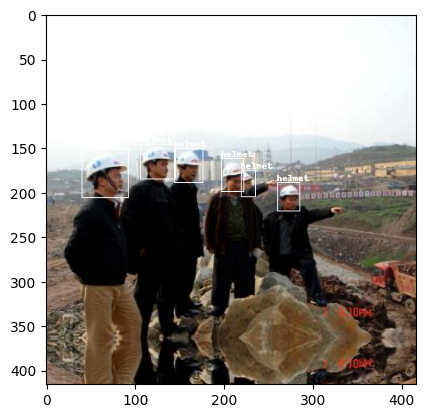

In [79]:
annotations = [os.path.join(ANNOTATION_PATH, x) for x in os.listdir(ANNOTATION_PATH) if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in annotations:
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join(ANNOTATION_PATH, x) for x in os.listdir(ANNOTATION_PATH) if x[-3:] == "txt"]

random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()
    
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [110]:
images = [os.path.join(IMG_PATH, x) for x in os.listdir(IMG_PATH)]
annotations = [os.path.join(ANNOTATION_PATH, x) for x in os.listdir(ANNOTATION_PATH) if x[-3:] == "txt"]

images.sort()
annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

[]


ValueError: Found input variables with inconsistent numbers of samples: [5000, 0]

In [111]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False


move_files_to_folder(train_images, 'archive/test_dataset/images/train')
move_files_to_folder(val_images, 'archive/test_dataset/images/val/')
move_files_to_folder(test_images, 'archive/test_dataset/images/test/')
move_files_to_folder(train_annotations, 'archive/test_dataset/annotations/train/')
move_files_to_folder(val_annotations, 'archive/test_dataset/annotations/val/')
move_files_to_folder(test_annotations, 'archive/test_dataset/annotations/test/')

archive/images/hard_hat_workers2107.png


AssertionError: 

In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO('yolov8n.pt')

In [ ]:
results = model.train(data='archive/test_dataset/road_sign_data.yaml', epochs=3)

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24564MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=archive/test_dataset/road_sign_data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti